# Introduction
Our dataset is a Wine Quality database, containing the following columns.<br>
Our aim is to make a classifier that predicts the "quality" variable with sufficient accuracy.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

file_path = 'winequalityN.csv'
df = pd.read_csv(file_path)

df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# Cleaning Dataset / Preprocessing
In our dataset we find many null values as described below

In [2]:

# Check for null values in each column
null_columns = df.columns[df.isnull().any()]
null_count = df[null_columns].isnull().sum()

# Display columns with null values and their respective counts
for column, count in zip(null_columns, null_count):
    print(f"Column '{column}' has {count} null values.")

# display the entire DataFrame with null values NaN
display(df[df.isnull().any(axis=1)])

Column 'fixed acidity' has 10 null values.
Column 'volatile acidity' has 8 null values.
Column 'citric acid' has 3 null values.
Column 'residual sugar' has 2 null values.
Column 'chlorides' has 2 null values.
Column 'pH' has 9 null values.
Column 'sulphates' has 4 null values.


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
17,white,NaN,0.660,0.48,1.2,0.029,29.0,75.0,0.98920,3.33,0.39,12.8,8
33,white,6.2,0.120,0.34,NaN,0.045,43.0,117.0,0.99390,3.42,0.51,9.0,6
54,white,6.8,0.200,0.59,0.9,0.147,38.0,132.0,0.99300,NaN,0.38,9.1,6
86,white,7.2,NaN,0.63,11.0,0.044,55.0,156.0,0.99740,3.09,0.44,8.7,6
98,white,9.8,0.360,0.46,10.5,NaN,4.0,83.0,0.99560,2.89,0.30,10.1,4
139,white,8.1,0.280,0.39,1.9,0.029,18.0,79.0,0.99230,NaN,0.52,11.8,6
174,white,NaN,0.270,0.31,17.7,0.051,33.0,173.0,0.99900,3.09,0.64,10.2,5
224,white,6.3,0.495,0.22,1.8,0.046,31.0,140.0,0.99290,3.39,NaN,10.4,6
249,white,NaN,0.410,0.14,10.4,0.037,18.0,119.0,0.99600,3.38,0.45,10.0,5
267,white,NaN,0.580,0.07,6.9,0.043,34.0,149.0,0.99440,3.34,0.57,9.7,5


Now we must see what to do with the null values, prune or impute.
We can drop the rows with the null values if it doesn't effect the dataset much.
For this we will see how many and what kind of rows are removed, and to do this we will create a new column called quality label as below.

In [3]:
df['quality_label'] = df.quality.apply(lambda q: 'low' if q <= 5 else 'medium' if q <= 7 else 'high')
df.quality_label.value_counts()

quality_label
medium    3915
low       2384
high       198
Name: count, dtype: int64

And now we will drop the rows with null values and see what happens

In [4]:
df = df.dropna()
df.quality_label.value_counts()

quality_label
medium    3894
low       2372
high       197
Name: count, dtype: int64

Since there is not drastic change in values, only 34 removed (0.5% of total) with 1 high, 12 low and 21 medium, the dataset is preserved enough despite dropping rows. Making this option safe to proceed with. 

# Running Classifiers
Now that we have preprocessed the data and removed null values, we will attempt to apply classification.<br>
Since our aim is to predict the quality of the wine (rated out of 10), we will assume each rating to be a class and the run following classifiers:<br>
1. Random Forest<br>
2. Decision Tree<br>
3. KNeighbors


In [5]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# Convert the previous low, medium, high quality_labels to class labels 0, 1, 2
type_mapping = {'white':0, 'red': 1}
df['type'] = df['type'].replace(type_mapping)
reduced_df = df.drop(columns=['quality_label', 'quality'])

# Standardize the data
scale = StandardScaler()
X = pd.DataFrame(scale.fit_transform(reduced_df), index=df.index)
Y = df['quality']

In [6]:
from sklearn.model_selection import cross_val_score, train_test_split
def classify(model, X, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # train the model
    model.fit(x_train, y_train)
    accuracy = model.score(x_test, y_test) * 100
    print("Accuracy:", accuracy)
    
    # cross-validation
    #score = cross_val_score(model, X, y, cv=5)
    #print("CV Score:", np.mean(score)*100)
    return accuracy

In [7]:
random_state = 42

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200, random_state=random_state)
print('_' * 40)
print('\033[1m' + "Random Forest Classifier" + '\033[0m')
rf_prev_acc = classify(model, X, Y)

from sklearn.tree import DecisionTreeClassifier
print('_' * 40)
print('\033[1m' + "Decision Tree Classifier" + '\033[0m')
model = DecisionTreeClassifier(max_depth=None, random_state=random_state)
dt_prev_acc = classify(model, X,Y)

from sklearn.neighbors import KNeighborsClassifier
print('_' * 40)
print('\033[1m' + "KNeighbours Classifier" + '\033[0m')
model = KNeighborsClassifier(n_neighbors=3)
knc_prev_acc = classify(model, X,Y)

________________________________________
Random Forest Classifier
Accuracy: 66.4775657555441
________________________________________
Decision Tree Classifier
Accuracy: 57.91645177926766
________________________________________
KNeighbours Classifier
Accuracy: 54.92521918514698


# Fixing Classifier Accuracy
The accuracy for our classifiers seem to be quite bad. Let's investigate the issue.
Let's visualize our Y

In [8]:
Y.value_counts()

quality
6    2820
5    2128
7    1074
4     214
8     192
3      30
9       5
Name: count, dtype: int64

We can see how the classes are skewed, the below graph indicating it's skewed towards 6 (median) and very less of extremes (3 and 9)

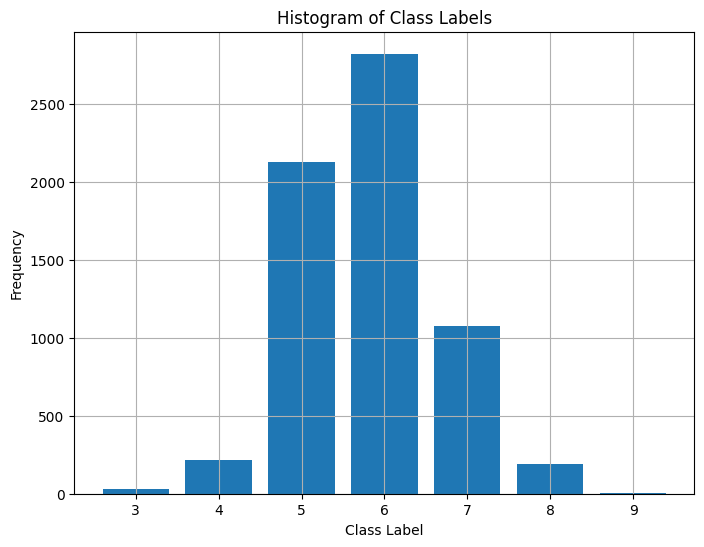

In [9]:
value_counts = Y.value_counts()
plt.figure(figsize=(8, 6))
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Class Label')
plt.ylabel('Frequency')
plt.title('Histogram of Class Labels')
plt.grid(True)
plt.show()

## Sampling
To fix our issue, we need to get a better sample of the dataset.<br>
We will now use SMOTE, because it gets average features from the neighbours, and create new features, fixing our issue of less extremes.

In [10]:
from imblearn.over_sampling import SMOTE
# using 'SMOTE', because it gets average features from the neighbours, and create new features
oversample = SMOTE(k_neighbors=4)
# transform the dataset
X, Y = oversample.fit_resample(X, Y)

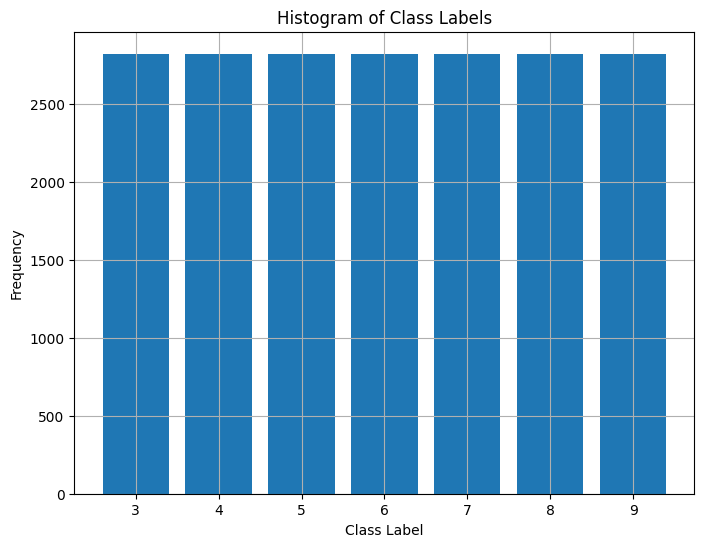

quality
6    2820
5    2820
7    2820
8    2820
4    2820
3    2820
9    2820
Name: count, dtype: int64

In [11]:
value_counts = Y.value_counts()
plt.figure(figsize=(8, 6))
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Class Label')
plt.ylabel('Frequency')
plt.title('Histogram of Class Labels')
plt.grid(True)
plt.show()
value_counts

We can now see that oversampling has fixed our issue with skewed classes.

## Feature Selection
We will apply feature selection to see if reducing features is improving our accuracy and decreasing computing power.

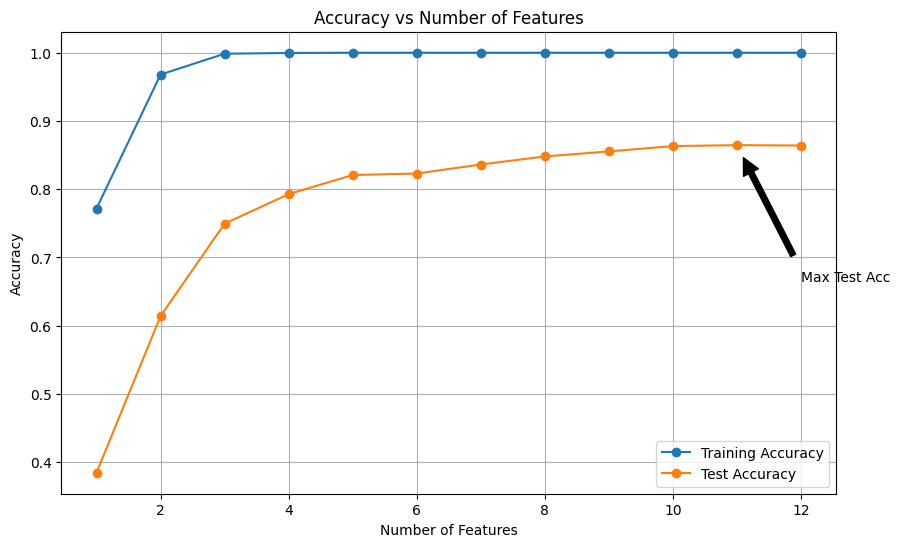

The best number of features: 11
Maximum Accuracy: 86.46%


In [22]:
from sklearn.feature_selection import SelectKBest, f_classif

# Define the range of features to consider
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
num_features_range = range(1, X.shape[1] + 1)

results = []

for num_features in num_features_range:
    # Select top k features
    selector = SelectKBest(score_func=f_classif, k=num_features)
    X_train_subset = selector.fit_transform(X_train, y_train)
    X_test_subset = selector.transform(X_test)
    
    # Train K-Nearest Neighbors Classifier
    KNC = KNeighborsClassifier(algorithm='ball_tree', leaf_size=12, n_neighbors=12, p=1, weights='distance')
    KNC.fit(X_train_subset, y_train)
    
    # Evaluate training and test accuracy
    train_accuracy = accuracy_score(y_train, KNC.predict(X_train_subset))
    test_accuracy = accuracy_score(y_test, KNC.predict(X_test_subset))
    
    # Store results
    results.append({'Features': num_features, 'Train_Acc': train_accuracy, 'Test_Acc': test_accuracy})

# Convert results to DataFrame
AccSubset = pd.DataFrame(results)

# Plotting accuracy vs number of features
plt.figure(figsize=(10, 6))
plt.plot(AccSubset['Features'], AccSubset['Train_Acc'], marker='o', label='Training Accuracy')
plt.plot(AccSubset['Features'], AccSubset['Test_Acc'], marker='o', label='Test Accuracy')

# Find the index of the maximum test accuracy
max_test_idx = AccSubset['Test_Acc'].idxmax()

# Annotate the maximum test accuracy point
plt.annotate('Max Test Acc', xy=(AccSubset.loc[max_test_idx, 'Features'], AccSubset.loc[max_test_idx, 'Test_Acc']),
             xytext=(max_test_idx + 2, AccSubset.loc[max_test_idx, 'Test_Acc'] - 0.2),
             arrowprops=dict(facecolor='black', shrink=0.1))

plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Features')
plt.legend()
plt.grid(True)
plt.show()

best_num_features = AccSubset.loc[max_test_idx, 'Features']
print(f"The best number of features: {best_num_features}")
print(f"Maximum Accuracy: {AccSubset.loc[max_test_idx, 'Test_Acc'] * 100:.2f}%")


## PCA and LDA
We will now apply PCA and LDA<br>
Starting with PCA, we will apply PCA multiple times with different n_components to figure out how many components we must select from our PCA output. We will use KNeigbours Classifier as a standard.

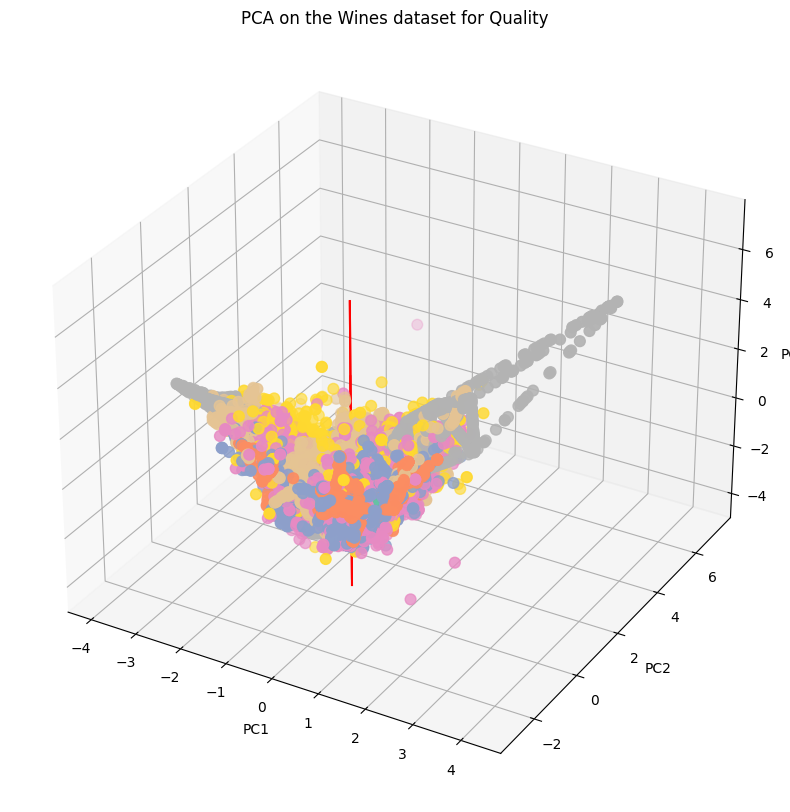

________________________________________

Accuracy on Quality Prediction By Number of PCA Components:



,Var_ratio,Train_Acc,Test_Acc
Components,,,
1,32.485753,1.0,0.381206
2,54.383988,1.0,0.691236
3,67.740039,1.0,0.787487
4,76.770028,1.0,0.828774
5,82.650190,1.0,0.849544
6,87.350600,1.0,0.853090
7,91.274190,1.0,0.861702
8,94.663765,1.0,0.860689
9,97.226133,1.0,0.864235


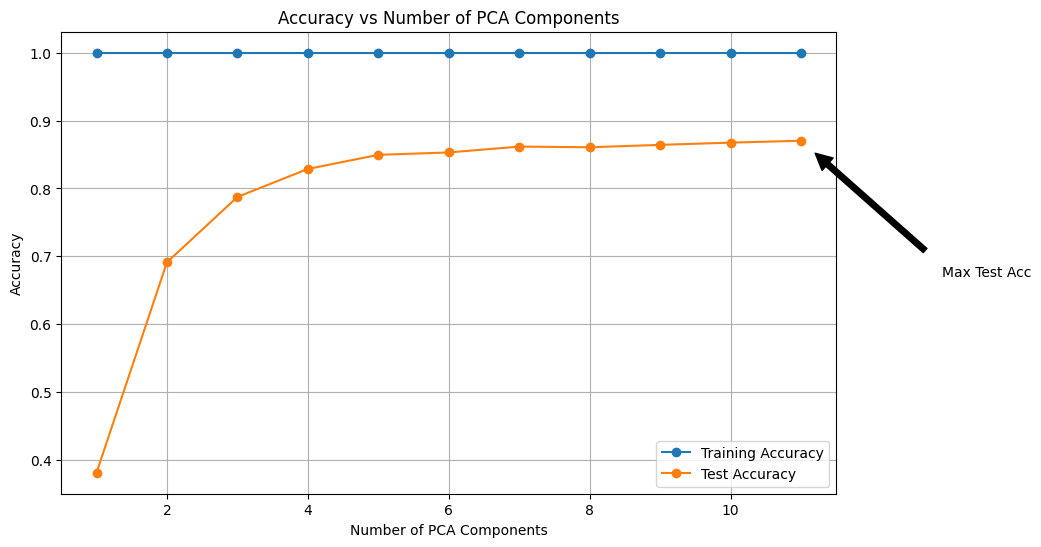

The best number of PCA components: 11
Maximum Accuracy: 87.03%


In [23]:
# Perform PCA
pca_all = PCA(random_state=69, whiten=True).fit(X)

# Store PCA results
result = pd.DataFrame(pca_all.transform(X), columns=[f'PCA{i}' for i in range(X.shape[1])], index=X.index)

# Plot PCA results
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(result['PCA0'], result['PCA1'], result['PCA2'], c=Y, cmap="Set2_r", s=60)

# Add axis lines
for dim in range(3):
    axis_line = ((0, 0), (0, 0), (min(result[f'PCA{dim}']), max(result[f'PCA{dim}'])))
    ax.plot(axis_line[0], axis_line[1], axis_line[2], 'r')

# Label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title(f"PCA on the Wines dataset for Quality")
plt.show()

# Split the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Evaluate accuracy by varying the number of PCA components
print('_' * 40)
print(f'\nAccuracy on Quality Prediction By Number of PCA Components:\n')
AccPca = pd.DataFrame(columns=['Components', 'Var_ratio', 'Train_Acc', 'Test_Acc'])

for components in np.arange(1, reduced_df.shape[1]):
    variance_ratio = sum(pca_all.explained_variance_ratio_[:components]) * 100
    pca = PCA(n_components=components, random_state=101, whiten=True)
    X_train_pca = pca.fit_transform(X_train)
    Components = X_train_pca.shape[1]
    KNC = KNeighborsClassifier(algorithm='ball_tree', leaf_size=12, n_neighbors=12, p=1, weights='distance')
    KNC = KNC.fit(X_train_pca, y_train)
    Training_Accuracy = accuracy_score(y_train, KNC.predict(X_train_pca))
    X_test_pca = pca.transform(X_test)
    y_pred = KNC.predict(X_test_pca)
    Test_Accuracy = accuracy_score(y_test, y_pred)
    AccPca = pd.concat([AccPca, pd.DataFrame([(Components, variance_ratio, Training_Accuracy, Test_Accuracy)],
                                        columns=['Components', 'Var_ratio', 'Train_Acc', 'Test_Acc'])])

AccPca.set_index('Components', inplace=True)
display(AccPca)

# Plotting accuracy vs number of PCA components
plt.figure(figsize=(10, 6))
plt.plot(AccPca.index, AccPca['Train_Acc'], marker='o', label='Training Accuracy')
plt.plot(AccPca.index, AccPca['Test_Acc'], marker='o', label='Test Accuracy')

# Find the index of the maximum test accuracy
max_test_idx = AccPca['Test_Acc'].idxmax()

# Annotate the maximum test accuracy point
plt.annotate('Max Test Acc', xy=(max_test_idx, AccPca.loc[max_test_idx, 'Test_Acc']), xytext=(max_test_idx + 2, AccPca.loc[max_test_idx, 'Test_Acc'] - 0.2),
             arrowprops=dict(facecolor='black', shrink=0.1))

plt.xlabel('Number of PCA Components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of PCA Components')
plt.legend()
plt.grid(True)
plt.show()

best_components_pca = max_test_idx
print(f"The best number of PCA components: {best_components_pca}")
print(f"Maximum Accuracy: {AccPca['Test_Acc'].max() * 100:.2f}%")

### LDA
We will now apply LDA with 6 components (since LDA supports upto only min(classes-1, features), and we figured 6 gives the best accuracy)


Apply LDA:

Number of features after LDA: 6
LR Training Accuracy With LDA: 100.00%
LR Test Accuracy With LDA: 82.57%


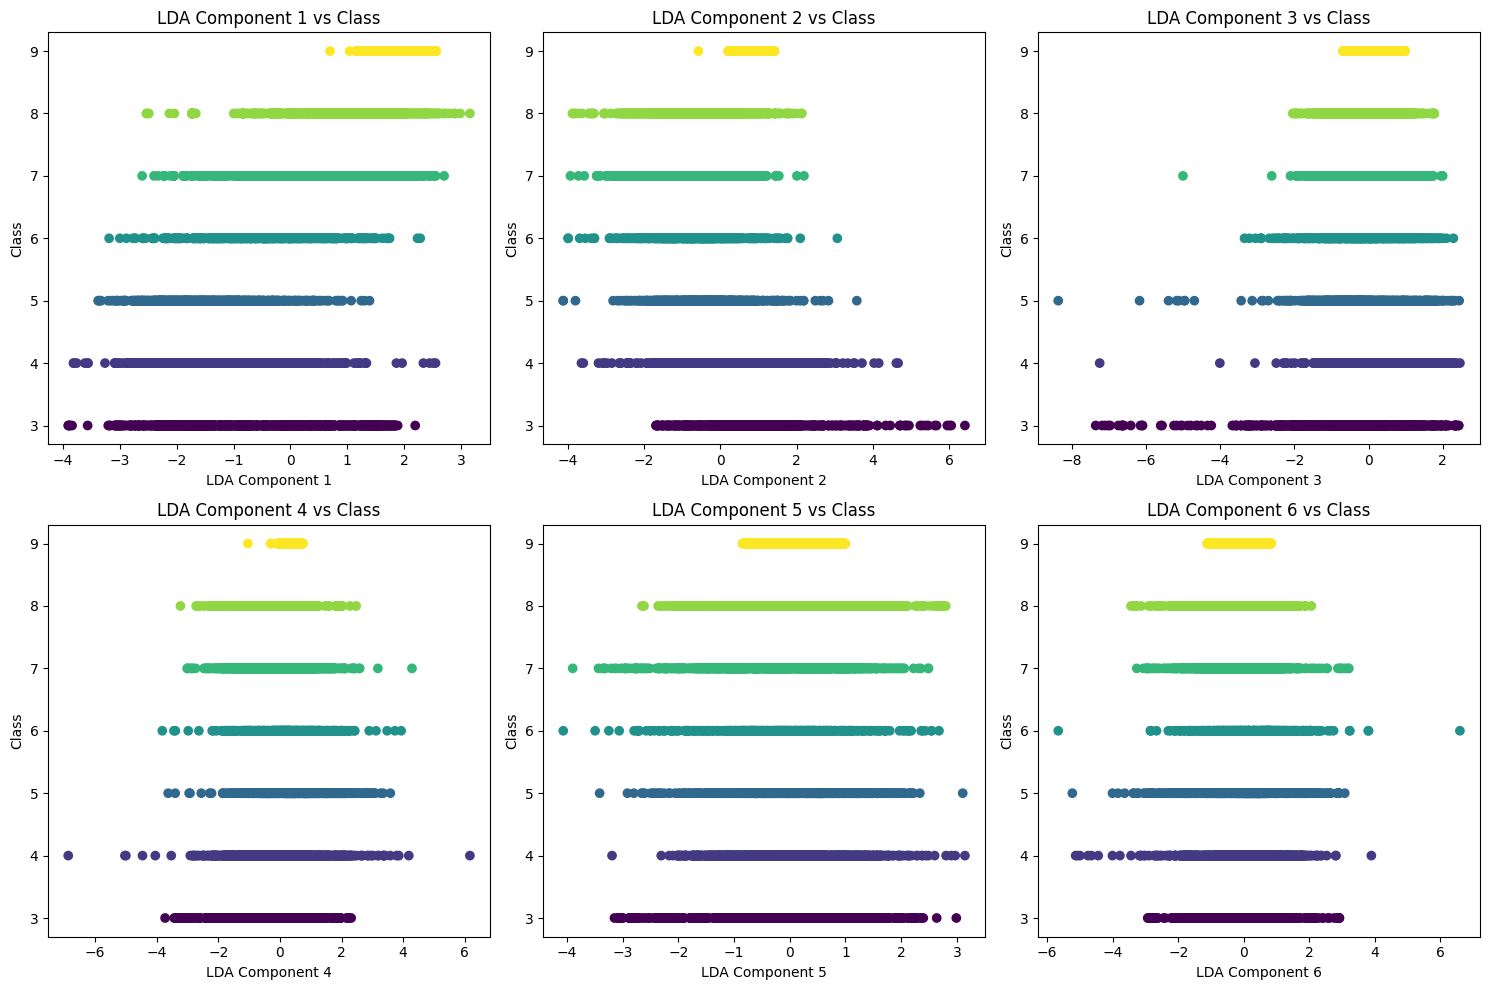

In [13]:
# Split the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Apply Linear Discriminant Analysis (LDA)
print('\nApply LDA:\n')
lda = LDA(n_components=6, store_covariance=True)
X_train_lda = lda.fit_transform(X_train, y_train)

print('Number of features after LDA:', X_train_lda.shape[1])

# Train and evaluate K-Nearest Neighbors Classifier with LDA
KNC_lda = KNeighborsClassifier(algorithm='ball_tree', leaf_size=12, n_neighbors=12, p=1, weights='distance')
KNC_lda = KNC_lda.fit(X_train_lda, y_train)
print('LR Training Accuracy With LDA: {:2.2%}'.format(accuracy_score(y_train, KNC_lda.predict(X_train_lda))))
X_test_lda = lda.transform(X_test)
y_pred_lda = KNC_lda.predict(X_test_lda)
print('LR Test Accuracy With LDA: {:2.2%}'.format(accuracy_score(y_test, y_pred_lda)))

plt.figure(figsize=(15, 10))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.scatter(X_test_lda[:, i], y_pred_lda, c=y_pred_lda, cmap='viridis')
    plt.xlabel(f'LDA Component {i+1}')
    plt.ylabel('Class')
    plt.title(f'LDA Component {i+1} vs Class')
plt.tight_layout()
plt.show()

### Result
Now after SMOTE and PCA/LDA, we will check our results.<br><br>
We can see that LDA gives ~82.9% accuracy while PCA gives us ~87.03% accuracy.
Feature Selection gives us ~86.46% accuracy
Thus we will discard LDA and feature selection, and instead use PCA to decrease dimensions, improving our classifiers speed and decreasing computing power needed.

# Classifying with new processed dataset
Now that we have applied SMOTE and PCA on our data, we will use it to see if it improved our Classifier accuracy.

In [14]:
components = best_components_pca
variance_ratio = sum(pca_all.explained_variance_ratio_[:components]) * 100
pca = PCA(n_components=components, random_state=101, whiten=True)
X_pca = pca.fit_transform(X)

random_state = 42

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200, random_state=random_state)
print('_' * 40)
print('\033[1m' + "Random Forest Classifier" + '\033[0m')
rf_new_acc = classify(model, X_pca, Y)

from sklearn.tree import DecisionTreeClassifier
print('_' * 40)
print('\033[1m' + "Decision Tree Classifier" + '\033[0m')
model = DecisionTreeClassifier(max_depth=None, random_state=random_state)
dt_new_acc = classify(model, X_pca,Y)

from sklearn.neighbors import KNeighborsClassifier
print('_' * 40)
print('\033[1m' + "KNeighbours Classifier" + '\033[0m')
model = KNeighborsClassifier(n_neighbors=3)
knc_new_acc = classify(model, X_pca,Y)

________________________________________
Random Forest Classifier
Accuracy: 88.58493752110773
________________________________________
Decision Tree Classifier
Accuracy: 81.52651131374536
________________________________________
KNeighbours Classifier
Accuracy: 84.58291117865586


# Conclusion
We can now see the increased accuracy after applying necessary preprocessing.

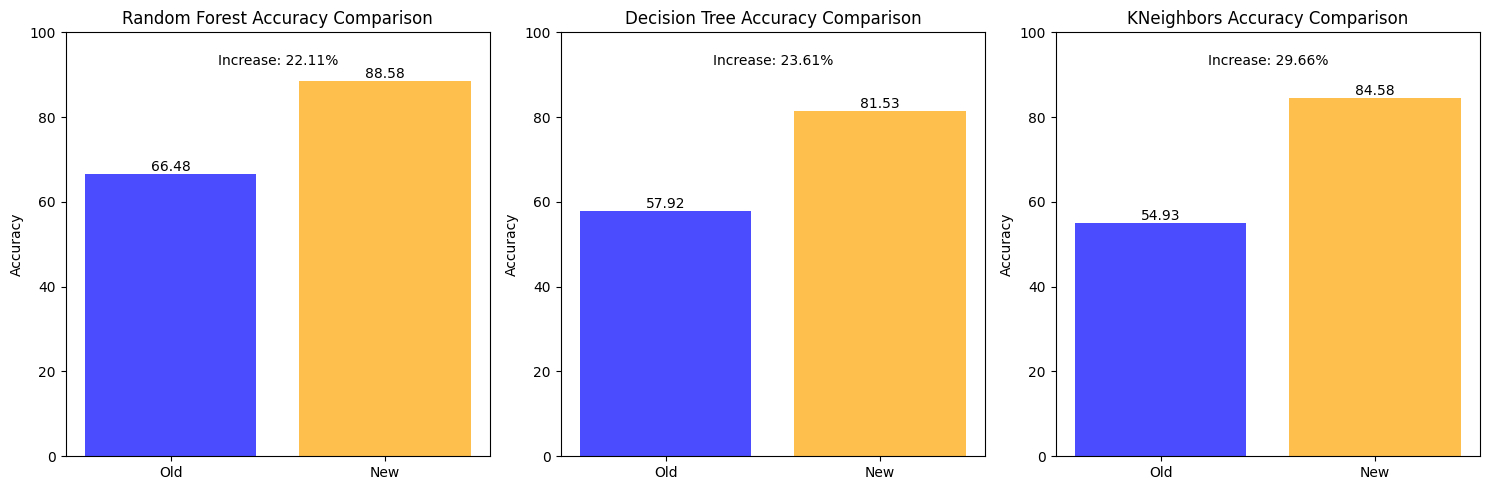

In [15]:
classifiers = ['Random Forest', 'Decision Tree', 'KNeighbors']
prev_acc = [rf_prev_acc, dt_prev_acc, knc_prev_acc]
new_acc = [rf_new_acc, dt_new_acc, knc_new_acc]
percent_increase = [(new - prev) for new, prev in zip(new_acc, prev_acc)]

plt.figure(figsize=(15, 5))
for i, classifier in enumerate(classifiers):
    plt.subplot(1, 3, i + 1)
    plt.bar(['Old', 'New'], [prev_acc[i], new_acc[i]], color=['blue', 'orange'], alpha=0.7)
    plt.title(f'{classifier} Accuracy Comparison')
    plt.ylabel('Accuracy')
    plt.ylim(0, 100)
    plt.text(0, prev_acc[i], f'{prev_acc[i]:.2f}', ha='center', va='bottom')
    plt.text(1, new_acc[i], f'{new_acc[i]:.2f}', ha='center', va='bottom')
    plt.text(0.5, 0.95, f'Increase: {percent_increase[i]:.2f}%', transform=plt.gca().transAxes,
             fontsize=10, verticalalignment='top', horizontalalignment='center')
plt.tight_layout()
plt.show()

### Voting Classifier
We have another way of increasing the accuracy altogether, the "Voting" Classifier.<br>
A voting classifier is a machine learning model that gains experience by training on a collection of several models.
Let's run the voting classifier using a combination of Random Forest, Decision Trees and KNeighbors.

In [25]:
from sklearn.ensemble import VotingClassifier
x_train, x_test, y_train, y_test = train_test_split(X_pca, Y, test_size=0.1, random_state=69)
voting_clf = VotingClassifier(estimators=[
    ('Random Forest', RandomForestClassifier(n_estimators=200, random_state=random_state)),
    ('Decision Tree', DecisionTreeClassifier(max_depth=None, random_state=random_state)),
    ('KNeighbors', KNeighborsClassifier(n_neighbors=3))
])

voting_clf.fit(x_train, y_train)
accuracy = voting_clf.score(x_test, y_test)
print(f'Voting Classifier Accuracy: {accuracy:.2%}')


Voting Classifier Accuracy: 90.88%


# We see that the Voting Classifer now has a final ~91% accuracy.